In [46]:
import requests
from pandas.io.json import json_normalize
import pandas as pd
import json

ARKK's annual growth: 120.63%


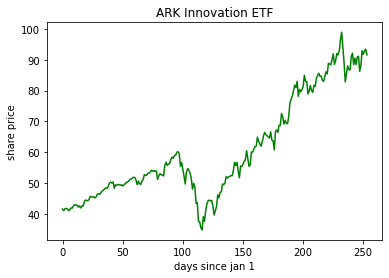

In [118]:
### pick your stock ###
stock = 'AAPL'

#function to retrieve title info from a stock
def get_title(stock):
    endpoint = 'https://api.tdameritrade.com/v1/marketdata/{stock_ticker}/quotes'
    full_url = endpoint.format(stock_ticker = stock)
    page = requests.get(url=full_url, params={'apikey' : td_consumer_key})
    content = json.loads(page.content)
    return content[stock]['description']

#function to calculate growth
def Growth(initial, final):
    dif = final-initial
    growth = dif/initial
    return growth

#setting up API connection
td_consumer_key = '{your_key}'
main_endpoint = 'https://api.tdameritrade.com/v1/marketdata/{stock_ticker}/pricehistory?&periodType={periodType}&period={period}&frequencyType={frequencyType}&frequency={frequency}'
full_url = main_endpoint.format(stock_ticker = stock, periodType = "year", period = 1, frequencyType = 'daily', frequency = 1)
page = requests.get(url=full_url, params={'apikey' : td_consumer_key})

#dataframe reading from json from the GET request
df = pd.read_json(page.url)

#fixing the dataframe with json_normalize
df = pd.json_normalize(df['candles'])

#graphing the dataframe
color = 'green'
last_entry = df['open'][250]
first_entry = df['open'][0]
if(last_entry < first_entry):
    color = 'red'
s = pd.Series(df['open'])
plot = s.plot(color=color, title=get_title(stock))
plot.set_xlabel('days since jan 1')
plot.set_ylabel('share price')

#displaying annual growth
growth = str(round(netGrowth(first_entry, last_entry)*100, 2)) + '%'
print(stock + '\'s annual growth: ' + growth)